RGB


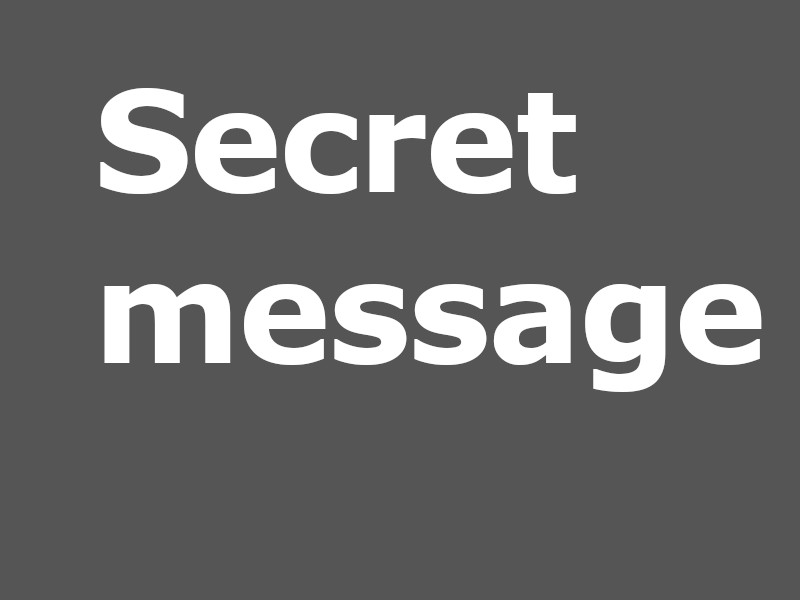

Image size: 800 600


In [69]:
from PIL import Image
import IPython.display as display

image_path = "secret.jpg"
image = Image.open(image_path)
print(image.mode)

# Set the maximum width or height for the resized image
max_size = 800

# Calculate the new dimensions while maintaining the aspect ratio
width, height = image.size
aspect_ratio = width / height

if width > height:
    new_width = max_size
    new_height = int(max_size / aspect_ratio)
else:
    new_height = max_size
    new_width = int(max_size * aspect_ratio)

resized_image = image.resize((new_width, new_height), Image.LANCZOS)
display.display(resized_image)
print("Image size:", new_width, new_height)

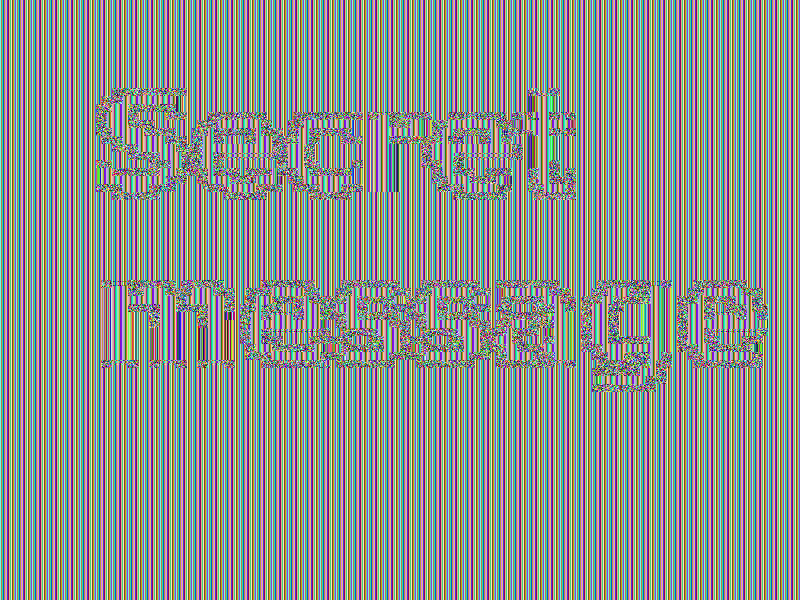

In [74]:
from Cryptodome.Cipher import AES
from Cryptodome.Util.Padding import pad

# Pad the image data to match the block size
block_size = AES.block_size
img_data = resized_image.tobytes()

# Initialize AES cipher in ECB mode
key = b'abcdefghijklmnop'
cipher = AES.new(key, AES.MODE_ECB)

# Encrypt the padded data
encrypted_bytes = cipher.encrypt(pad(img_data, block_size))
encrypted_img = Image.frombytes(resized_image.mode, (new_width, new_height), encrypted_bytes)
display.display(encrypted_img)

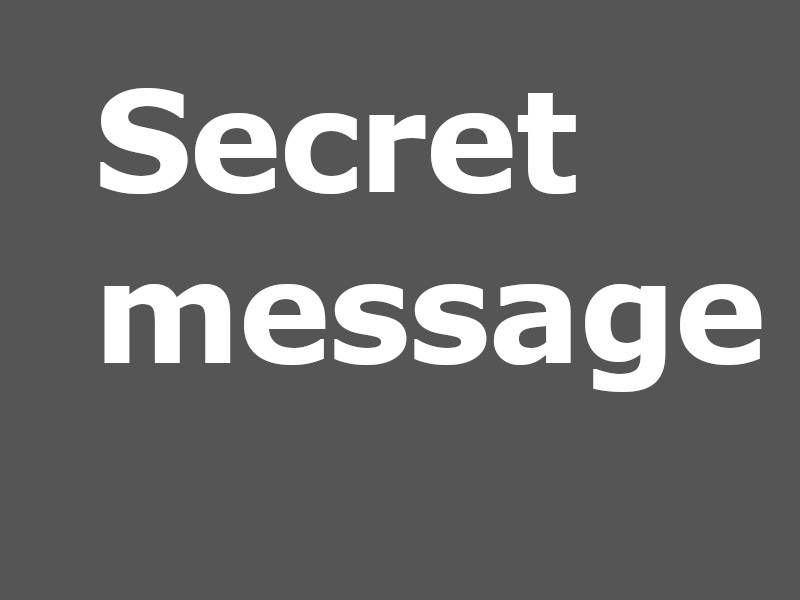

In [75]:
from Cryptodome.Util.Padding import unpad

decrypted_img_bytes = unpad(cipher.decrypt(encrypted_bytes), block_size)
decrypted_image = Image.frombytes(resized_image.mode, (new_width, new_height), decrypted_img_bytes)
display.display(decrypted_image)